              sseqid
0         OV277454.1
1         MN894805.1
2         CP076413.1
3     XR_006695749.1
4         OV277454.1
...              ...
9331     NR_103099.1
9332  XR_006269445.1
9333      KF104644.1
9334      CP068261.2
9335      AL590668.5

[9336 rows x 1 columns]
              sseqid
0     XP_023382753.1
1         EGG54221.1
2     XP_023382753.1
3     XP_023382753.1
4       KAI3371017.1
...              ...
5937  XP_023382753.1
5938    KAI4904286.1
5939      GGX54770.1
5940      QTS83770.1
5941      CDE77342.1

[5942 rows x 1 columns]
OV277454.1        5223
MN894805.1         586
XR_006695749.1     152
OV277463.1         151
OV277457.1         108
                  ... 
OV179167.1           1
HQ659117.1           1
AC254813.1           1
CP087586.1           1
AL590668.5           1
Name: sseqid, Length: 1290, dtype: int64
XP_023382753.1    4513
KAI4904286.1       278
KAI3371017.1       117
KAG1957571.1        52
CBA31922.1          36
                  ... 
WP_215900574.1

/tmp/ipykernel_16454/4150928734.py:232: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count = sseq_count_series3.append(ser)


                                              sseqid  count
0        Meles meles genome assembly, chromosome: 13   5223
1  Homo sapiens haplogroup H3v+16093 mitochondrio...    586
2                                              Other   3527


/tmp/ipykernel_16454/4150928734.py:267: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count2 = sseq_count_series6.append(ser2)
/tmp/ipykernel_16454/4150928734.py:344: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=5.0)


                                              sseqid  count
0  uncharacterized protein LOC111735491, partial ...   4513
1  hypothetical protein NFI96_007442, partial [Pr...    278
2                                              Other   1151


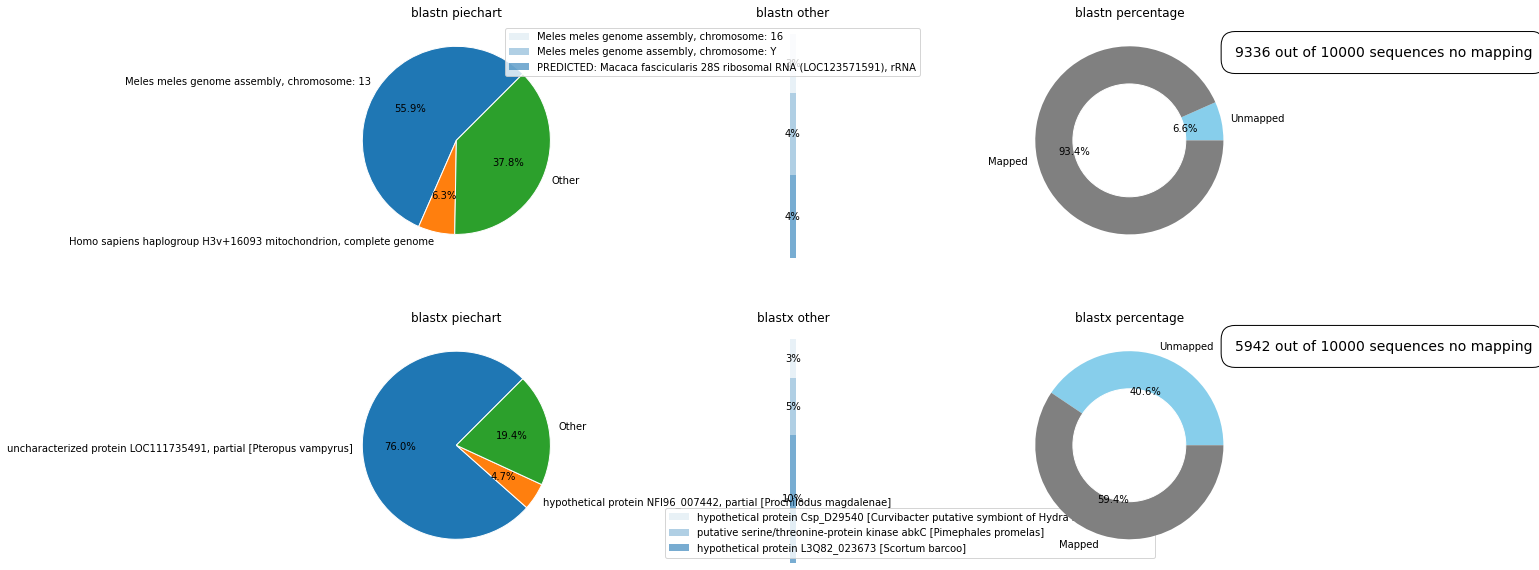

<Figure size 432x288 with 0 Axes>

In [21]:
#select intepreter and change environment to anaconda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import xmltodict
from xml.dom import minidom
import time


#handles command line input parameter
import sys
import os

# testing file is from 10,000 reads, so mapping percentage is expected to be out of 10 mil
blast_tsv_file = 'LARP6.CTRL_IN1.umi.r1.fqdown_unmappedblast_downsampled_blastn.tsv'
blast_tsv_file2 = 'LARP6.CTRL_IN1.umi.r1.fqdown_unmappedblast_downsampled_blastx.tsv'
piePath = 'Combined.png'
piePathSample = os.path.splitext(piePath)[0]
piePathSample2 = os.path.split(piePathSample)
pieName = piePathSample2[1]

#ncbi query functions
def esearch(term, db='gds'):
    """
    Queries NCBI using the esearch utility. GEO ('gds') database is used as default for search term.
    """
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db={db}&term={term}&retmax=5000&usehistory=y'
    response = urllib.request.urlopen(url)
    return response.read()


def get_esummary(esearch_string, db='gds'):
    """
    Parses a http response in XML format to obtain the webenv and querykey tokens.
    Uses NCBI eutils to transform these tokens into web summaries of GEO (db='gds') datasets.
    """
    xmldoc = minidom.parseString(esearch_string)
    try:
        webenv = xmldoc.getElementsByTagName('WebEnv')[0].firstChild.data
        querykey = xmldoc.getElementsByTagName('QueryKey')[0].firstChild.data
        host = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi'
        params = f'?db={db}&version=2.0&query_key={querykey}&WebEnv={webenv}'
        url = host + params
        response = urllib.request.urlopen(url)
        return response.read()
    except IndexError as e:
        print(f"Unparsable publication string ({e}, search={esearch_string}")
        return ""

#matplotlib to build the piechart
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(9, 5))
fig.tight_layout(h_pad=2)
plt.subplots_adjust(bottom=0, right=1.5, top=1.5)
ax1.set_title('blastn piechart')
ax2.set_title('blastn other')
ax3.set_title('blastx piechart')
ax4.set_title('blastx other')
ax5.set_title('blastn percentage')
ax6.set_title('blastx percentage')





# Read the blast n file
df = pd.read_csv(blast_tsv_file, header=None, sep='\t')
df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df2 = df[['qseqid','sseqid','evalue']].copy()

# Read the blast x file
df4 = pd.read_csv(blast_tsv_file2, header=None, sep='\t')
df4.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']




### still need to reorganize the code for each different file below.


#blast n output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list1 = []
qseqid_list1 = []
for idx in df.index:
        if df['qseqid'][idx] not in qseqid_list1:
                qseqid_list1.append(df['qseqid'][idx])
                sseqid_list1.append(df['sseqid'][idx])
sseqid_np1 = np.array(sseqid_list1)

#blast x output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list2 = []
qseqid_list2 = []
for idx in df4.index:
        if df4['qseqid'][idx] not in qseqid_list2:
                qseqid_list2.append(df4['qseqid'][idx])
                sseqid_list2.append(df4['sseqid'][idx])
sseqid_np2 = np.array(sseqid_list2)

df3 = pd.DataFrame(data = sseqid_np1, columns=['sseqid'])
print(df3)
num_seqs = df3.size
df5 = pd.DataFrame(data = sseqid_np2, columns=['sseqid'])
print(df5)
num_seqs2 = df5.size

sseq_count_series1 = df3['sseqid'].value_counts()
print(sseq_count_series1)

sseq_count_series4 = df5['sseqid'].value_counts()
print(sseq_count_series4)

#loop through series to determine which elements to remove and add into "other" column
to_remove1 = []
other_count1 = 0
otherDict1 = {}
to_remove2 = []
other_count2 = 0
otherDict2 = {}

#blastn number mapped
print(num_seqs)

#blastx number mapped
print(num_seqs2)

#taking 1% of number of sequences for blast n
only_2_n = 2
for index,values in sseq_count_series1.iteritems():
        if(values < (0.001)*(num_seqs)) or only_2_n == 0:
                to_remove1.append(index)
                other_count1 += values
                otherDict1[values] = index
        else:
            only_2_n -= 1

#taking 1% of number of sequences for blast x
only_2_x = 2
for index,values in sseq_count_series4.iteritems():
        if(values < (0.001)*(num_seqs2)) or only_2_x == 0:
                to_remove2.append(index)
                other_count2 += values
                otherDict2[values] = index
        else:
            only_2_x -= 1

otherAnswer1 = []
increment1 = 0
for key,value in sorted(otherDict1.items(),reverse=True):
        if increment1 <= 2:
                otherAnswer1.append((key,value))
                increment1+=1
        else:
             break              
                
otherAnswer2 = []
increment2 = 0
for key,value in sorted(otherDict2.items(),reverse=True):
        if increment2 <= 2:
                otherAnswer2.append((key,value))
                increment2+=1
        else:
             break

gene_ratios = []
gene_labels = []  
gene_labels_raw = []  

for idx in range(len(otherAnswer1)):
        gene_ratios.append(otherAnswer1[idx][0]/other_count1)
        gene_labels_raw.append(otherAnswer1[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw)):
        term = str(gene_labels_raw[idx])
        print(term)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels.append(sseq_name)                          
                
gene_ratios2 = []
gene_labels2 = []
gene_labels_raw2 = []

for idx in range(len(otherAnswer2)):
        gene_ratios2.append(otherAnswer2[idx][0]/other_count2)
        gene_labels_raw2.append(otherAnswer2[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw2)):
        term = str(gene_labels_raw2[idx])
        print(term)
        esearch_string = esearch(term=term, db='protein')
        time.sleep(0.3)
        result = get_esummary(esearch_string=esearch_string, db='protein')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels2.append(sseq_name) 
               
                

#remove these elements from series
sseq_count_series2 = sseq_count_series1.drop(to_remove1)
sseq_count_series5 = sseq_count_series4.drop(to_remove2)

sseq_name_list = []
sseqid = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series2.iteritems():
        sseqid.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements = {sseqid:sseq_name_list for sseqid, sseq_name_list in zip(sseqid, sseq_name_list)}
sseq_count_series3 = sseq_count_series2.rename(replacements)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d = {'Other':other_count1}
ser = pd.Series(data=d, index=['Other'])

#append new element
sseq_count = sseq_count_series3.append(ser)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df = pd.DataFrame({'sseqid':sseq_count.index, 'count':sseq_count.values})
print(sseq_count_df)

count = sseq_count_df['count']
sseq = sseq_count_df['sseqid']



sseq_name_list2 = []
sseqid2 = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series5.iteritems():
        sseqid2.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='protein')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='protein')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list2.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements2 = {sseqid2:sseq_name_list2 for sseqid2, sseq_name_list2 in zip(sseqid2, sseq_name_list2)}
sseq_count_series6 = sseq_count_series5.rename(replacements2)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d2 = {'Other':other_count2}
ser2 = pd.Series(data=d2, index=['Other'])

#append new element
sseq_count2 = sseq_count_series6.append(ser2)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df2 = pd.DataFrame({'sseqid':sseq_count2.index, 'count':sseq_count2.values})
print(sseq_count_df2)

count2 = sseq_count_df2['count']
sseq2 = sseq_count_df2['sseqid']

bottom = 1
width = 0.2

wedges1, *_ = ax1.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Other unmapped reads')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * 2, 2.5 * 2)



bottom = 1
width = 0.2

wedges2, *_ = ax3.pie(count2, labels = sseq2, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios2, gene_labels2)])):
    bottom -= height
    bc = ax4.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax4.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
# ax4.set_title('Other unmapped reads')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * 2, 2.5 * 2)




### Get the percentage of the the blast n/x mapped results
# for ax5
ax5_percentages = [10000 - num_seqs, num_seqs]
ax5_labels = ['Unmapped', 'Mapped']
ax5.pie(ax5_percentages, labels=ax5_labels, autopct='%1.1f%%',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# for ax6
ax6_percentages = [10000 - num_seqs2, num_seqs2]
ax6_labels = ['Unmapped', 'Mapped']
ax6.pie(ax6_percentages, labels=ax6_labels, autopct='%1.1f%%',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# Adding Circle in Pie chart
circle1 = plt.Circle((0, 0), radius=0.6, color='white')
ax5.add_patch(circle1)
circle2 = plt.Circle((0, 0), radius=0.6, color='white')
ax6.add_patch(circle2)

text1 = str(num_seqs) + " out of 10000 sequences no mapping"
text2 = str(num_seqs2) + " out of 10000 sequences no mapping"

# plt.title('Blastn and Blastx Unmapped Sequences Summary ' + pieName)
ax5.text(0.95, 2.2, text1, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
ax6.text(0.95, 0.95, text2, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

fig.tight_layout(pad=5.0)
plt.show(block=True)
plt.savefig(piePath,format='png',bbox_inches='tight')


['Homo sapiens intraflagellar transport 46 (IFT46), transcript variant 1, mRNA', 'Homo sapiens cDNA FLJ76328 complete cds', 'Homo sapiens chromosome 11 open reading frame 60, mRNA (cDNA clone MGC:22722 IMAGE:4078579), complete cds', 'Homo sapiens chromosome 11 open reading frame 60, mRNA (cDNA clone MGC:12844 IMAGE:4300917), complete cds', 'Homo sapiens chromosome 11 open reading frame 60, mRNA (cDNA clone MGC:2732 IMAGE:2822487), complete cds', 'Homo sapiens FOSMID clone ABC13-910122L2 from chromosome unknown, complete sequence', 'Homo sapiens chromosome 11 open reading frame 60, mRNA (cDNA clone MGC:22722 IMAGE:4078579), complete cds', 'Homo sapiens chromosome 11 open reading frame 60, mRNA (cDNA clone MGC:2732 IMAGE:2822487), complete cds', 'Homo sapiens cDNA: FLJ21827 fis, clone HEP01387', 'Homo sapiens genomic DNA, chromosome 11 clone:RP11-861M13, complete sequence']


TypeError: Mismatch between array dtype ('<U105') and format specifier ('%.18e')

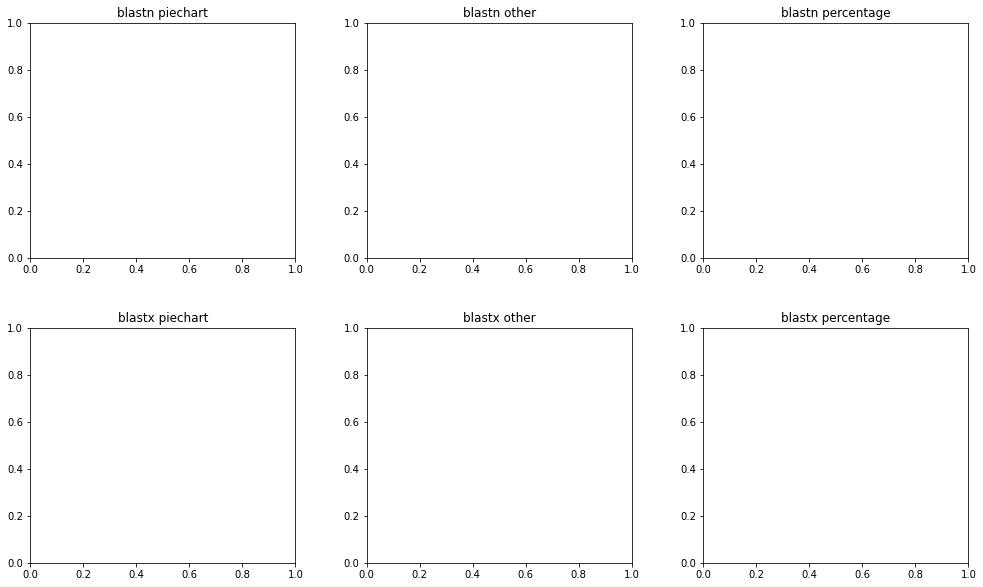

In [5]:
#select intepreter and change environment to anaconda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import xmltodict
from xml.dom import minidom
import time


#handles command line input parameter
import sys
import os

# testing file is from 10,000 reads, so mapping percentage is expected to be out of 10,000
# blast_tsv_file = sys.argv[1]
# blast_tsv_file2 = sys.argv[2]
# piePath = sys.argv[3]
blast_tsv_file = 'ATPX_unmappedblast_downsampled_blastn.tsv'
blast_tsv_file2 = 'ATPX_unmappedblast_downsampled_blastn2.tsv'
piePath = 'Combined.png'

piePathSample = os.path.splitext(piePath)[0]
piePathSample2 = os.path.split(piePathSample)
pieName = piePathSample2[1]


#ncbi query functions
def esearch(term, db='gds'):
    """
    Queries NCBI using the esearch utility. GEO ('gds') database is used as default for search term.
    """
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db={db}&term={term}&retmax=5000&usehistory=y'
    response = urllib.request.urlopen(url)
    return response.read()


def get_esummary(esearch_string, db='gds'):
    """
    Parses a http response in XML format to obtain the webenv and querykey tokens.
    Uses NCBI eutils to transform these tokens into web summaries of GEO (db='gds') datasets.
    """
    xmldoc = minidom.parseString(esearch_string)
    try:
        webenv = xmldoc.getElementsByTagName('WebEnv')[0].firstChild.data
        querykey = xmldoc.getElementsByTagName('QueryKey')[0].firstChild.data
        host = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi'
        params = f'?db={db}&version=2.0&query_key={querykey}&WebEnv={webenv}'
        url = host + params
        response = urllib.request.urlopen(url)
        return response.read()
    except IndexError as e:
        print(f"Unparsable publication string ({e}, search={esearch_string}")
        return ""

#matplotlib to build the piechart
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(9, 5))
fig.tight_layout(h_pad=2)
plt.subplots_adjust(bottom=0, right=1.5, top=1.5)
ax1.set_title('blastn piechart')
ax2.set_title('blastn other')
ax3.set_title('blastx piechart')
ax4.set_title('blastx other')
ax5.set_title('blastn percentage')
ax6.set_title('blastx percentage')





# Read the blast n file
df = pd.read_csv(blast_tsv_file, header=None, sep='\t')
df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df2 = df[['qseqid','sseqid','evalue']].copy()

# Read the blast x file
df4 = pd.read_csv(blast_tsv_file2, header=None, sep='\t')
df4.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']




### still need to reorganize the code for each different file below.


#blast n output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list1 = []
qseqid_list1 = []
for idx in df.index:
        if df['qseqid'][idx] not in qseqid_list1:
                qseqid_list1.append(df['qseqid'][idx])
                sseqid_list1.append(df['sseqid'][idx])
sseqid_np1 = np.array(sseqid_list1)

#blast x output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list2 = []
qseqid_list2 = []
for idx in df4.index:
        if df4['qseqid'][idx] not in qseqid_list2:
                qseqid_list2.append(df4['qseqid'][idx])
                sseqid_list2.append(df4['sseqid'][idx])
sseqid_np2 = np.array(sseqid_list2)





ncbi_names1 = []
ncbi_names2 = []
#replace index sseqids with ncbi name
for idx in df.index:
    term = str(df['sseqid'][idx])
    #print(term)
    esearch_string = esearch(term=term, db='nucleotide')
    time.sleep(0.1)
    result = get_esummary(esearch_string=esearch_string, db='nucleotide')
    result = xmltodict.parse(result)
    sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
    ncbi_names1.append(sseq_name)
#replace index sseqids with ncbi name
for idx in df4.index:
    term = str(df4['sseqid'][idx])
    #print(term)
    esearch_string = esearch(term=term, db='nucleotide')
    time.sleep(0.3)
    result = get_esummary(esearch_string=esearch_string, db='nucleotide')
    result = xmltodict.parse(result)
    sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
    ncbi_names2.append(sseq_name)
print(ncbi_names1)
ncbinp_names1 = np.array(ncbi_names1)
ncbinp_names2 = np.array(ncbi_names2)
np.savetxt('testoutput1.txt', ncbinp_names1, delimiter=',')
np.savetxt('testoutput2.txt', ncbinp_names2, delimiter=',')






df3 = pd.DataFrame(data = sseqid_np1, columns=['sseqid'])
print(df3)
num_seqs = df3.size
df5 = pd.DataFrame(data = sseqid_np2, columns=['sseqid'])
print(df5)
num_seqs2 = df5.size

sseq_count_series1 = df3['sseqid'].value_counts()
print(sseq_count_series1)

sseq_count_series4 = df5['sseqid'].value_counts()
print(sseq_count_series4)

#loop through series to determine which elements to remove and add into "other" column
to_remove1 = []
other_count1 = 0
otherDict1 = {}
to_remove2 = []
other_count2 = 0
otherDict2 = {}

#blastn number mapped
print(num_seqs)

#blastx number mapped
print(num_seqs2)

#taking 1% of number of sequences for blast n
only_2_n = 2
for index,values in sseq_count_series1.iteritems():
        if(values < (0.001)*(num_seqs)) or only_2_n == 0:
                to_remove1.append(index)
                other_count1 += values
                otherDict1[values] = index
        else:
            only_2_n -= 1

#taking 1% of number of sequences for blast x
only_2_x = 2
for index,values in sseq_count_series4.iteritems():
        if(values < (0.001)*(num_seqs2)) or only_2_x == 0:
                to_remove2.append(index)
                other_count2 += values
                otherDict2[values] = index
        else:
            only_2_x -= 1

otherAnswer1 = []
increment1 = 0
for key,value in sorted(otherDict1.items(),reverse=True):
        if increment1 <= 2:
                otherAnswer1.append((key,value))
                increment1+=1
        else:
             break              
                
otherAnswer2 = []
increment2 = 0
for key,value in sorted(otherDict2.items(),reverse=True):
        if increment2 <= 2:
                otherAnswer2.append((key,value))
                increment2+=1
        else:
             break

gene_ratios = []
gene_labels = []
gene_labels_count = []
gene_labels_raw = []  

for idx in range(len(otherAnswer1)):
        gene_ratios.append(otherAnswer1[idx][0]/other_count1)
        gene_labels_count.append(otherAnswer1[idx][0])
        gene_labels_raw.append(otherAnswer1[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw)):
        term = str(gene_labels_raw[idx])
        print(term)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels.append(sseq_name)                          
                
gene_ratios2 = []
gene_labels2 = []
gene_labels2_count = []
gene_labels_raw2 = []

for idx in range(len(otherAnswer2)):
        gene_ratios2.append(otherAnswer2[idx][0]/other_count2)
        gene_labels2_count.append(otherAnswer2[idx][0])
        gene_labels_raw2.append(otherAnswer2[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw2)):
        term = str(gene_labels_raw2[idx])
        print(term)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.3)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels2.append(sseq_name) 
               
                

#remove these elements from series
sseq_count_series2 = sseq_count_series1.drop(to_remove1)
sseq_count_series5 = sseq_count_series4.drop(to_remove2)

sseq_name_list = []
sseqid = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series2.iteritems():
        sseqid.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements = {sseqid:sseq_name_list for sseqid, sseq_name_list in zip(sseqid, sseq_name_list)}
sseq_count_series3 = sseq_count_series2.rename(replacements)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d = {'Other':other_count1}
ser = pd.Series(data=d, index=['Other'])

#append new element
sseq_count = sseq_count_series3.append(ser)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df = pd.DataFrame({'sseqid':sseq_count.index, 'count':sseq_count.values})
print(sseq_count_df)

count = sseq_count_df['count']
sseq = sseq_count_df['sseqid']



sseq_name_list2 = []
sseqid2 = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series5.iteritems():
        sseqid2.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list2.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements2 = {sseqid2:sseq_name_list2 for sseqid2, sseq_name_list2 in zip(sseqid2, sseq_name_list2)}
sseq_count_series6 = sseq_count_series5.rename(replacements2)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d2 = {'Other':other_count2}
ser2 = pd.Series(data=d2, index=['Other'])

#append new element
sseq_count2 = sseq_count_series6.append(ser2)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df2 = pd.DataFrame({'sseqid':sseq_count2.index, 'count':sseq_count2.values})
print(sseq_count_df2)

count2 = sseq_count_df2['count']
sseq2 = sseq_count_df2['sseqid']

bottom = 1
width = 0.2

wedges1, *_ = ax1.pie(count, labels=[f'{sseq[i]}: {count[i]} ({count[i]/sum(count)*100:.1f}% )' for i in range(len(sseq))], colors=None,autopct='',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label, num) in enumerate(reversed([*zip(gene_ratios, gene_labels, gene_labels_count)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}({num})"], label_type='center')

# ax2.set_title('Other unmapped reads')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * 2, 2.5 * 2)



bottom = 1
width = 0.2

wedges2, *_ = ax3.pie(count2, labels=[f'{sseq2[i]}: {count2[i]} ({count2[i]/sum(count2)*100:.1f}% )' for i in range(len(sseq2))], colors=None,autopct='',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label, num) in enumerate(reversed([*zip(gene_ratios2, gene_labels2, gene_labels2_count)])):
    bottom -= height
    bc = ax4.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax4.bar_label(bc, labels=[f"{height:.0%}({num})"], label_type='center')
    
# ax4.set_title('Other unmapped reads')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * 2, 2.5 * 2)




### Get the percentage of the the blast n/x mapped results
# for ax5
ax5_percentages = [10000 - num_seqs, num_seqs]
ax5_labels = ['Unmapped', 'Mapped']
ax5.pie(ax5_percentages, labels=[f'{ax5_labels[i]}: {ax5_percentages[i]} ({ax5_percentages[i]/sum(ax5_percentages)*100:.1f}% )' for i in range(len(ax5_labels))], autopct='',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# for ax6
ax6_percentages = [10000 - num_seqs2, num_seqs2]
ax6_labels = ['Unmapped', 'Mapped']
ax6.pie(ax6_percentages, labels=[f'{ax6_labels[i]}: {ax6_percentages[i]} ({ax6_percentages[i]/sum(ax6_percentages)*100:.1f}% )' for i in range(len(ax6_labels))], autopct='',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# Adding Circle in Pie chart
circle1 = plt.Circle((0, 0), radius=0.6, color='white')
ax5.add_patch(circle1)
circle2 = plt.Circle((0, 0), radius=0.6, color='white')
ax6.add_patch(circle2)

text1 = str(num_seqs) + " out of 10000 sequences no mapping"
text2 = str(num_seqs2) + " out of 10000 sequences no mapping"

# plt.title('Blastn and Blastx Unmapped Sequences Summary ' + pieName)
ax5.text(0.95, 2.2, text1, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
ax6.text(0.95, 0.95, text2, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

fig.tight_layout(pad=5.0)
plt.show(block=True)